In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogames-sales-dataset/PS4_GamesSales.csv
/kaggle/input/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv
/kaggle/input/videogames-sales-dataset/XboxOne_GameSales.csv


**THE QUESTION**
What are the NA_Sales for a game before it is released in the United States?

We are predicting NA_SALES using Platform, Y_O_R(Maybe), Genre, Publisher(Maybe), Developer, Rating

In [2]:
vgdata = pd.read_csv('../input/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
#Dropping null values from columns where not a lot are missing
vgdata.dropna(subset=['Name'],inplace=True)
vgdata.dropna(subset=['Year_of_Release'],inplace=True)
vgdata.dropna(subset=['Publisher'],inplace=True)
vgdata.dropna(subset=['Genre'],inplace=True)

#Filling Null Values for larger missing data
vgdata['Developer'].fillna('None',inplace=True)
vgdata['Rating'].fillna('None',inplace=True)

In [4]:
print("Shape of DF")
print('-'*30)
print("ROWS: {}        COLUMNS: {}".format(vgdata.shape[0],vgdata.shape[1]))

Shape of DF
------------------------------
ROWS: 16416        COLUMNS: 16


In [5]:
vgdata.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,None,None
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,None,None


In [6]:
vgdata.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

Continuous
-----------
NA_SALES(float)

Categorical
-----------------
Platform(string)

Y_O_R(float)(Maybe) 

Genre(string) 

Publisher(string)(Maybe) 

Developer(string) 

Rating(string) 

In [7]:
print('Missing Values %')
print("-"*25)
print(round(vgdata.isnull().sum()/vgdata.shape[0]*100,2))

Missing Values %
-------------------------
Name                0.00
Platform            0.00
Year_of_Release     0.00
Genre               0.00
Publisher           0.00
NA_Sales            0.00
EU_Sales            0.00
JP_Sales            0.00
Other_Sales         0.00
Global_Sales        0.00
Critic_Score       51.38
Critic_Count       51.38
User_Score         54.55
User_Count         54.55
Developer           0.00
Rating              0.00
dtype: float64


In [8]:
vgdata.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,7.126900,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,1.498886,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [9]:
#Sorting
vgdata.sort_values('NA_Sales',ascending=False).head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,None,None
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,None,None
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,None,None
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


Text(0, 0.5, 'Number Sold(Millions)')

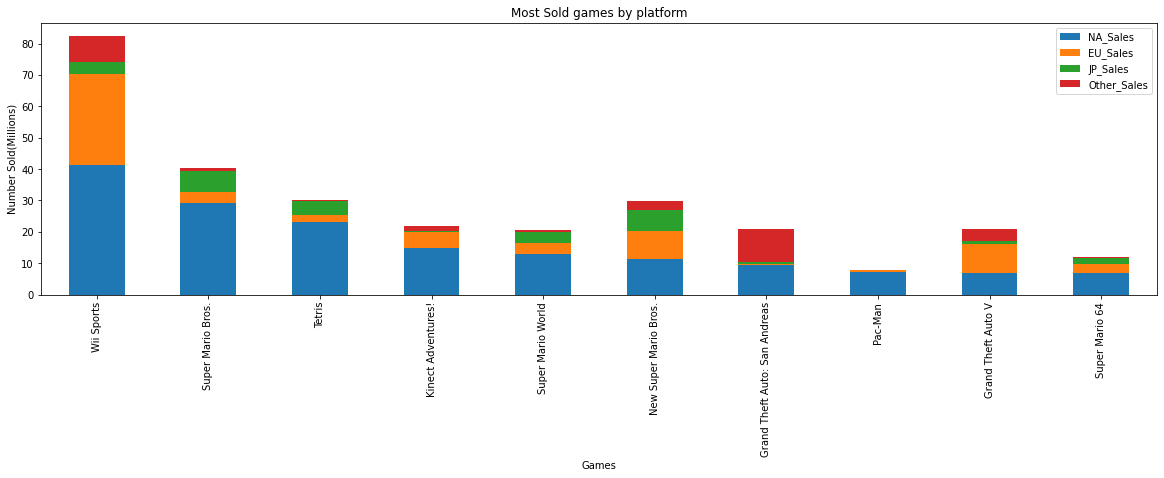

In [10]:
#Groupby best game visualization
vgdata[['Platform','Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]\
.loc[vgdata.groupby('Platform').NA_Sales.agg('idxmax')]\
.sort_values('NA_Sales',ascending=False)[0:10]\
.set_index('Name')\
.plot(kind='bar',stacked=True,figsize=(20,5))

plt.title("Most Sold games by platform")
plt.xlabel("Games")
plt.ylabel("Number Sold(Millions)")
#vgdata.groupby(['Platform','Name'], as_index=False)['Global_Sales'].max().sort_values("Global_Sales",ascending=False).head(10)

From the graph above Wii Sports is the top selling game of all time. 
Interesting facts:
1. Other group likes GTA
2. JP sales for SMB is higher than Wii Sports
3. Kinect adventures almost no JP sales
4. NA Has highest number of sales for video games compared to others

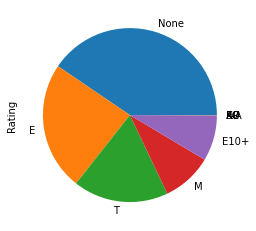

In [11]:
data=vgdata.Rating.value_counts()
data.plot(kind='pie')

E is the most popular rating followed by T

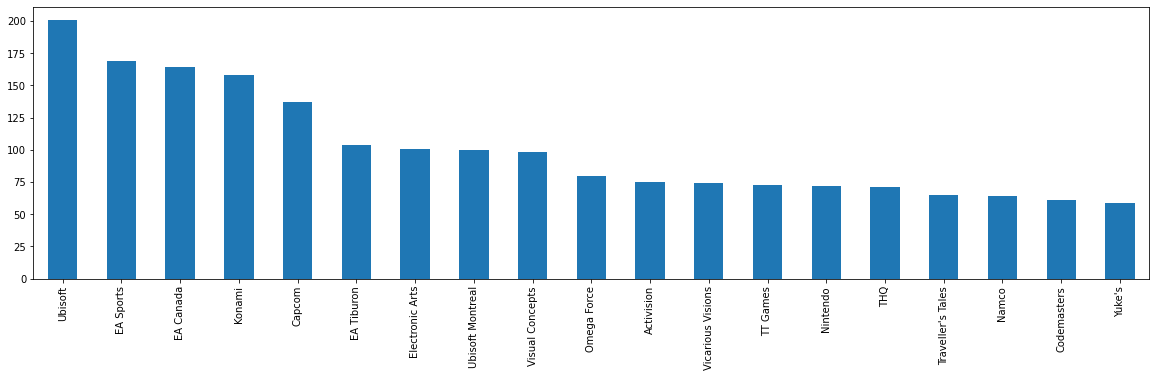

In [12]:
data=vgdata.Developer.value_counts()[1:20]
data.plot(kind='bar',figsize=(20,5))

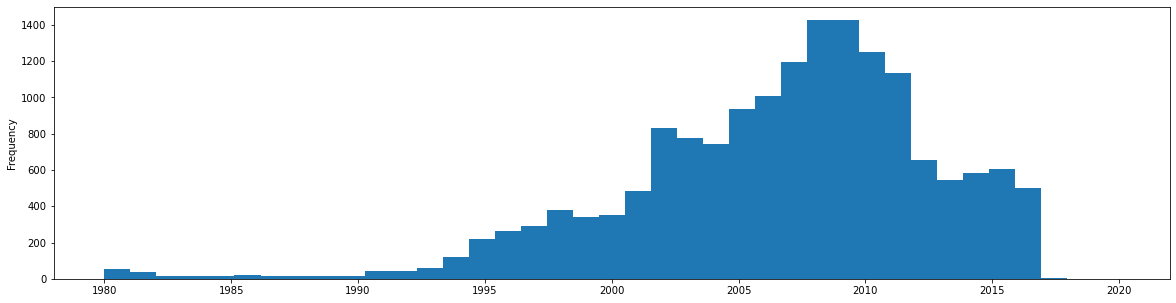

In [13]:
data=vgdata.Year_of_Release
data.plot.hist(by='Year_of_Release',bins=data.nunique(),figsize=(20,5))

It looks like 2007-2010 is the best for video game sales

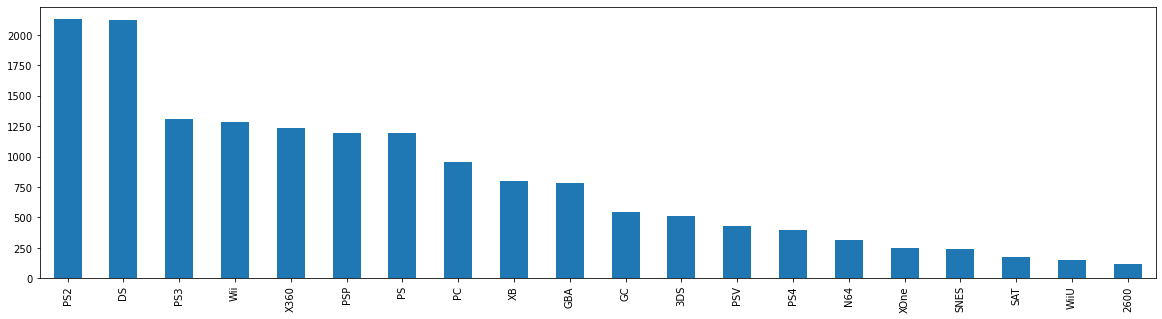

In [14]:
data=vgdata.Platform.value_counts()[0:20]
data.plot(kind='bar',figsize=(20,5))

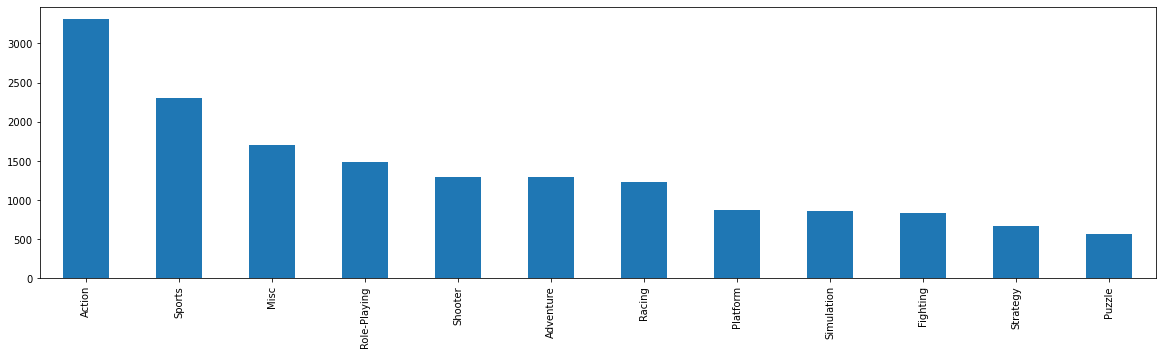

In [15]:
data=vgdata.Genre.value_counts()[0:20]
data.plot(kind='bar',figsize=(20,5))

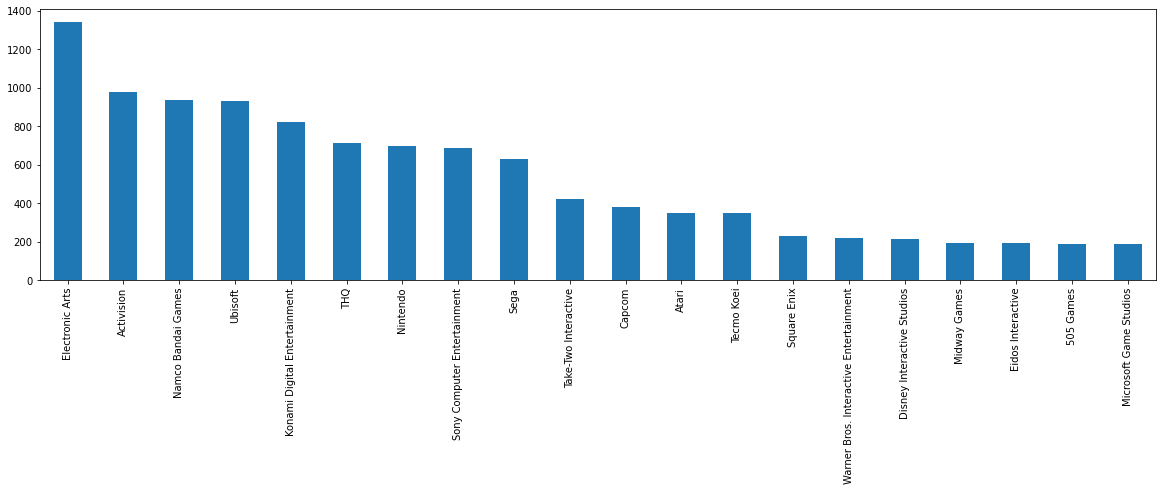

In [16]:
data=vgdata.Publisher.value_counts()[0:20]
data.plot(kind='bar',figsize=(20,5))

(-1.0, 1.0)

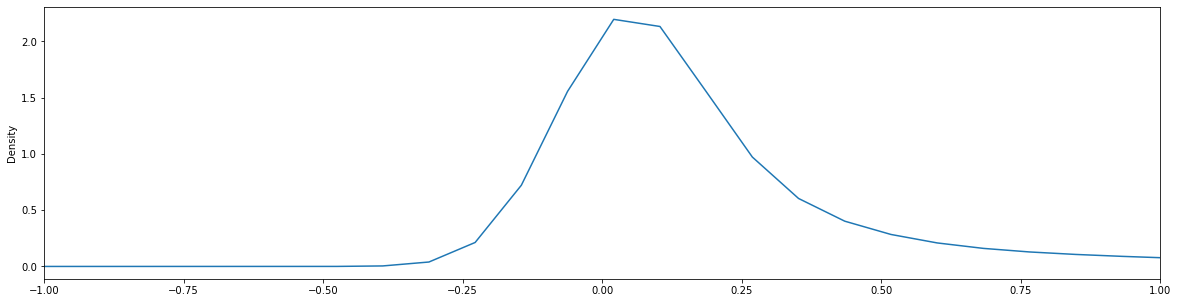

In [17]:
import matplotlib.pyplot as plt
vgdata['NA_Sales'].plot(kind='kde',figsize=(20,5))
plt.xlim((-1,1))

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


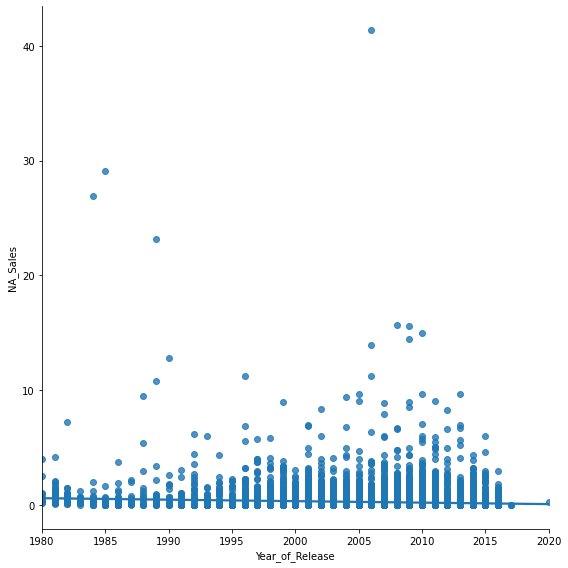

In [18]:
sns.lmplot(x='Year_of_Release',y='NA_Sales',data=vgdata,size=8)

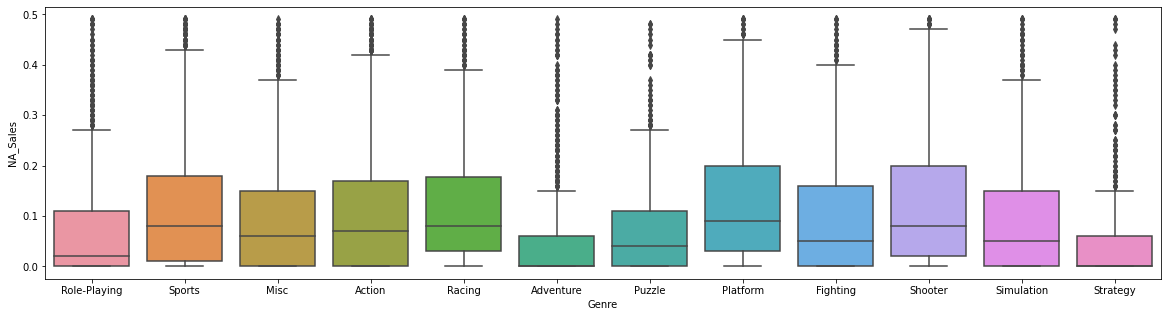

In [19]:
nicedata=vgdata[vgdata['NA_Sales']<0.5]
nicedata=nicedata[nicedata['NA_Sales']>-0.5]
fig=plt.gcf()
sns.boxplot(x='Genre',y='NA_Sales',data=nicedata)
fig.set_size_inches(20, 5)

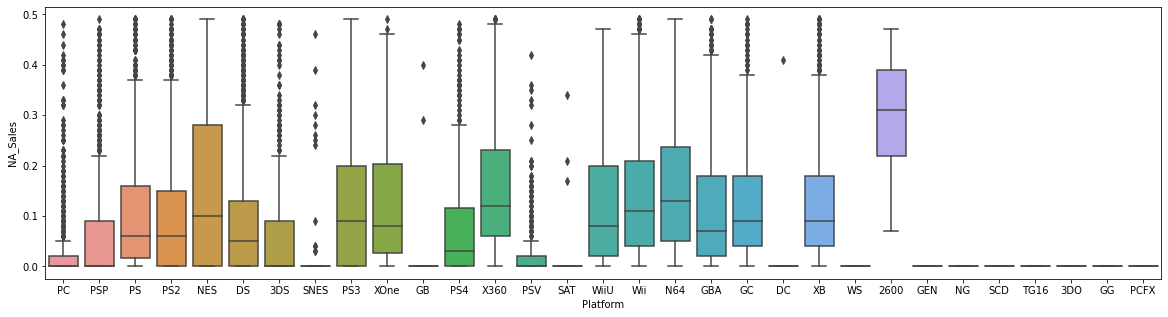

In [20]:
fig=plt.gcf()
sns.boxplot(x='Platform',y='NA_Sales',data=nicedata)
fig.set_size_inches(20, 5)

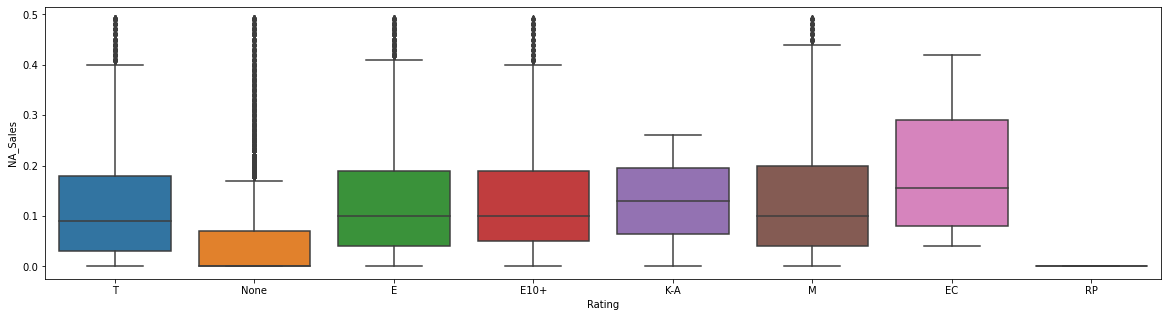

In [21]:
fig=plt.gcf()
sns.boxplot(x='Rating',y='NA_Sales',data=nicedata)
fig.set_size_inches(20, 5)

In [22]:
#CLEAN DATASET
## Remove or Replace NULL VALUELS
## One-Hot Encoding/Label Encoding Categorical columns

In [23]:
#Drop Columns we will not use
vgdata.drop(["Critic_Score","Critic_Count","User_Score","User_Count","Global_Sales",'JP_Sales',"EU_Sales","Other_Sales"],
            axis=1,inplace=True)

In [24]:
vgdata.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,None,None
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,None,None


In [25]:
#Checking cardinality

columns=['Platform','Year_of_Release','Genre','Publisher','Developer','Rating']
for i in columns:
    print(i)
    print("_"*20)
    print(vgdata[i].nunique())
    print('\n')

Platform
____________________
31


Year_of_Release
____________________
39


Genre
____________________
12


Publisher
____________________
580


Developer
____________________
1681


Rating
____________________
9




In [26]:
#OHE(Get_dummies) GENRE AND RATING
vgdata=pd.concat([vgdata,pd.get_dummies(vgdata.Rating)],axis=1)
vgdata=pd.concat([vgdata,pd.get_dummies(vgdata.Genre)],axis=1)
vgdata.drop(['Genre','Rating'],axis=1,inplace=True)

In [27]:
vgdata.head()

,Name,Platform,Year_of_Release,Publisher,NA_Sales,Developer,AO,E,E10+,EC,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,Wii,2006.0,Nintendo,41.36,Nintendo,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,NES,1985.0,Nintendo,29.08,None,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Nintendo,15.68,Nintendo,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,Wii,2009.0,Nintendo,15.61,Nintendo,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,None,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
#LABEL ENCODE DEVELOPER PUBLISHER YEAR_OF RELEASE AND PLATFORM

Dev_LE=LabelEncoder()
vgdata.Developer=Dev_LE.fit_transform(vgdata.Developer)

Pub_LE=LabelEncoder()
vgdata.Publisher=Pub_LE.fit_transform(vgdata.Publisher)

YOR_LE=LabelEncoder()
vgdata.Year_of_Release=YOR_LE.fit_transform(vgdata.Year_of_Release)

Plat_LE=LabelEncoder()
vgdata.iloc[:,1]=Plat_LE.fit_transform(vgdata.iloc[:,1])

vgdata.rename(columns={vgdata.columns[1]:'System'}, inplace=True)

vgdata.head()

,Name,System,Year_of_Release,Publisher,NA_Sales,Developer,AO,E,E10+,EC,...,Fighting,Misc,System,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,26,26,361,41.36,1008,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,11,5,361,29.08,1027,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,26,28,361,15.68,1008,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,26,29,361,15.61,1008,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,5,16,361,11.27,1027,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
#Create Variables for ML
Y=vgdata['NA_Sales']
X=vgdata
X.drop(['NA_Sales'],axis=1,inplace=True)

In [30]:
X.drop('Name',axis=1,inplace=True)
X.head()

,System,Year_of_Release,Publisher,Developer,AO,E,E10+,EC,K-A,M,...,Fighting,Misc,System,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,26,26,361,1008,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11,5,361,1027,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,26,28,361,1008,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,26,29,361,1008,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,16,361,1027,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [61]:
LR=LinearRegression()
#fit
LR.fit(X_train,y_train)
#predict
pred = LR.predict(X_test)
#scoring
print(mean_squared_error(y_test,pred))

1.0341989542546934
